In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [388]:
from util import *
%run util

In [352]:
df_2 = read_data('Open Data Policy Comparison_08_24')

In [353]:
# Transpose the csv
df_2 = df_2.T

In [354]:
new_header = df_2.iloc[0] #grab the first row for the header
df_2 = df_2[1:] #take the data less the header row
df_2 = df_2.rename(columns = new_header) #set the header row as the df header

In [355]:
# rename the name of the first column to "City"
df_2.columns.values[0] = "City"

In [356]:
# deselect last 8 rows with null values
df_2 = df_2[:-8]

This file has 61 columns. Those columns include information about cities as well as whether they comply with each of the 31 guidelines as laid out by Sunlight Foundation. Each row corresponds to a unique open data policy.

In [357]:
# drop all rows with nan's
df_2 = df_2.dropna(axis=0, how="all")

In [358]:
df_2[df_2["Year Enacted"].isnull()]

,City,BASICS,Type,Link,Legal Means,Year Enacted,Date Enacted,Prior Versions?,Population (ACS 2012; US Census 2012 est for counties),Guidance / Supplement,...,28. Create processes to ensure data quality,29. Ensure sufficient funding for implementation,30. Create or explore potential partnerships,31. Mandate future review for potential changes to this policy,nan,# of close fit,# of opposite,# of blank space and n/a,# of adopted guidelines,adoption rate of a version of policy(total score/31*2)


#### No rows with all null values

# 1) Overall cities open data policies analysis

####  The following code is used to convert the datatypes into the desired format (string, int, float etc.)

In [359]:
df_2['adoption rate of a version of policy(total score/31*2)'] = df_2['adoption rate of a version of policy(total score/31*2)'].astype(str)
df_2['adoption rate of a version of policy(total score/31*2)'] = df_2['adoption rate of a version of policy(total score/31*2)'].str.replace('%','')
df_2['adoption rate of a version of policy(total score/31*2)'] = df_2['adoption rate of a version of policy(total score/31*2)'].astype(float)/100

In [360]:
df_2['Year Enacted'] = pd.to_numeric(df_2['Year Enacted'], errors="coerce")
df_2['City'] = df_2['City'].astype('str')

#### Filtering the dataframe to be used later

In [361]:
all_sunlight_cities = df_2.groupby(['City', 'Year Enacted', 'adoption rate of a version of policy(total score/31*2)'], as_index=False).sum().iloc[:,0:3]

In [362]:
all_sunlight_cities['Year Enacted'] = all_sunlight_cities['Year Enacted'].apply(np.floor)

In [363]:
all_sunlight_cities.head()

,City,Year Enacted,adoption rate of a version of policy(total score/31*2)
0,"Amherst, NY",2014.0,0.3710
1,"Anchorage, AK",2016.0,0.7097
2,"Arlington County, VA",2016.0,0.2903
3,"Asheville, NC",2015.0,0.5806
4,"Austin, TX",2011.0,0.0000


#### Filtering the data based on year

In [364]:
all_sunlight_cities_filtered_by_year = all_sunlight_cities.sort_index(by=['Year Enacted'], ascending=[True])

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


### Number of cities that adopted policies in each year

In [365]:
all_cities_year_count = explore_analysis("City","Year Enacted", "groupby_count", all_sunlight_cities_filtered_by_year)

In [366]:
all_cities_year_count

,Year Enacted,City
0,2006.0,1
1,2009.0,3
2,2010.0,1
3,2011.0,6
4,2012.0,9
5,2013.0,16
6,2014.0,25
7,2015.0,11
8,2016.0,28
9,2017.0,10


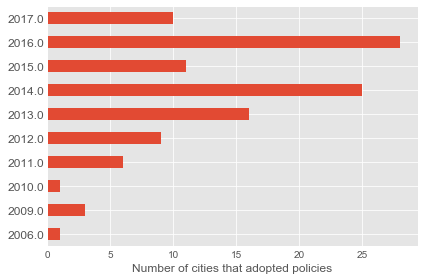

In [367]:
horizontal_bar_from_dataframe(all_cities_year_count, 'Year Enacted', 'City', 'Number of cities that adopted policies')

### Adoption (mean) rate -- year-wise

In [368]:
all_cities_year_mean = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted", "groupby_mean", all_sunlight_cities_filtered_by_year)

In [369]:
all_cities_year_mean

,Year Enacted,adoption rate of a version of policy(total score/31*2)
0,2006.0,0.000000
1,2009.0,0.172067
2,2010.0,0.000000
3,2011.0,0.123667
4,2012.0,0.288522
5,2013.0,0.358881
6,2014.0,0.352908
7,2015.0,0.436955
8,2016.0,0.469468
9,2017.0,0.651610


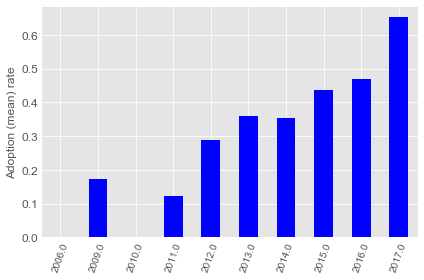

In [370]:
vertical_bar_from_dataframe(all_cities_year_mean, 'Year Enacted', 'adoption rate of a version of policy(total score/31*2)', 'Adoption (mean) rate')

### Adoption (median) rate -- year-wise

In [371]:
all_cities_year_median = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted", "groupby_median", all_sunlight_cities_filtered_by_year)

In [372]:
all_cities_year_median

,Year Enacted,adoption rate of a version of policy(total score/31*2)
0,2006.0,0.00000
1,2009.0,0.25810
2,2010.0,0.00000
3,2011.0,0.12100
4,2012.0,0.37100
5,2013.0,0.36290
6,2014.0,0.37100
7,2015.0,0.50000
8,2016.0,0.50000
9,2017.0,0.64515


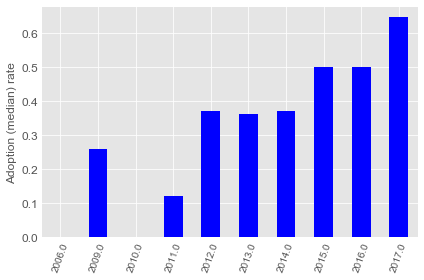

In [373]:
vertical_bar_from_dataframe(all_cities_year_median, 'Year Enacted', 'adoption rate of a version of policy(total score/31*2)', 'Adoption (median) rate')

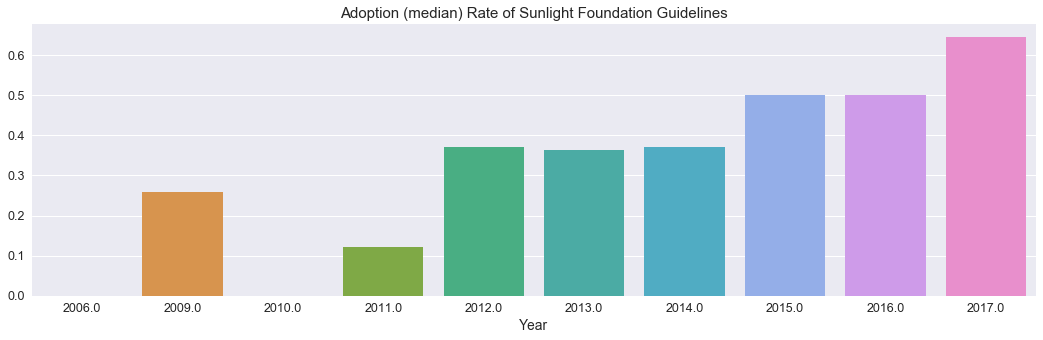

In [391]:
visual_median = seaborn_chart('Year Enacted', 'adoption rate of a version of policy(total score/31*2)', all_cities_year_median, 'Year', '', 'Adoption (median) Rate of Sunlight Foundation Guidelines')

Insights:
- 

# 2) Cities that passed multiple policies

#### finding cities that have passed multiple policies

In [288]:
all_cities_duplicate = all_sunlight_cities.duplicated("City", keep=False)
all_cities_duplicate_full = all_sunlight_cities[all_cities_duplicate]

In [289]:
all_cities_duplicate_full.head()

,City,Year Enacted,adoption rate of a version of policy(total score/31*2)
4,"Austin, TX",2011.0,0.0000
5,"Austin, TX",2013.0,0.5161
7,"Baltimore, MD",2011.0,0.0000
8,"Baltimore, MD",2016.0,0.0000
14,"Cambridge, MA",2014.0,0.0000


#### sort (ascending) the list of cities according to the year

In [290]:
all_cities_duplicate_full = all_cities_duplicate_full.sort_index(by=['Year Enacted'], ascending=[True])

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [291]:
all_cities_duplicate_full.head()

,City,Year Enacted,adoption rate of a version of policy(total score/31*2)
104,"Washington, D.C.",2006.0,0.0
81,"San Francisco, CA",2009.0,0.0
82,"San Francisco, CA",2010.0,0.0
4,"Austin, TX",2011.0,0.0
7,"Baltimore, MD",2011.0,0.0


In [292]:
multiple_cities = duplicate_values_dictionary(all_cities_duplicate_full)

In [318]:
#print out the names of cities and the number of policies
for city, values in multiple_cities.items():
    print(city, values)

Cambridge, MA [2014.0, 0.0, 2015.0, 0.629]
Austin, TX [2011.0, 0.0, 2013.0, 0.5161]
Las Vegas [2014.0, 0.3387, 2016.0, 0.6774]
Washington, D.C. [2006.0, 0.0, 2011.0, 0.0968, 2014.0, 0.5806]
San Diego, CA [2014.0, 0.2581, 2014.0, 0.4839]
Scottsdale, AZ [2016.0, 0.3226, 2017.0, 0.45159999999999995, 2017.0, 0.8065000000000001]
New Hampshire [2012.0, 0.0, 2013.0, 0.1452]
Tulsa, OK [2013.0, 0.2581, 2015.0, 0.5161]
Baltimore, MD [2011.0, 0.0, 2016.0, 0.0]
San Francisco, CA [2009.0, 0.0, 2010.0, 0.0, 2013.0, 0.5323]
Kansas City, MO [2014.0, 0.2581, 2014.0, 0.371, 2015.0, 0.0323]
Seattle, WA [2016.0, 0.7742, 2016.0, 0.6774]
Tempe, AZ [2017.0, 0.5806, 2017.0, 0.871]


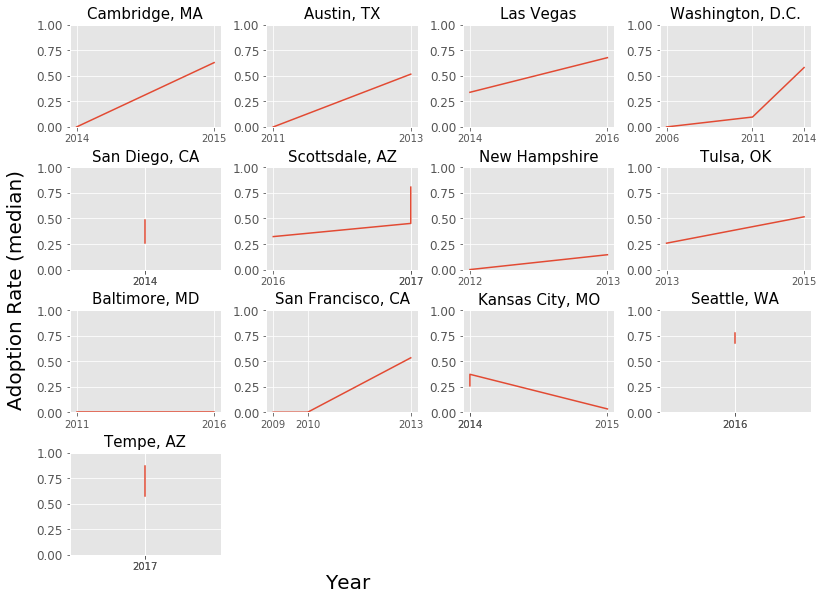

In [313]:
small_multiples_plots_for_duplicate_cities(multiple_cities)